# Contactless Fingerprint Extraction Tests

In [1]:
import numpy as np
import cv2
import open3d as o3d

import matplotlib.pyplot as plt

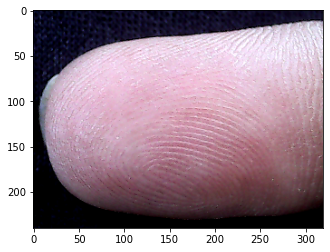

In [82]:
path = "../data/github-dataset/39.pgm"
img = cv2.imread(path)

# Original Fingerprint Image
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB);

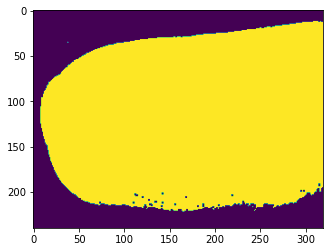

In [83]:
# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)

# Erosion
kernel = np.ones((2, 2), np.uint8)
thresh = cv2.erode(thresh, kernel)

# Visualize the binary image
plt.imshow(thresh)

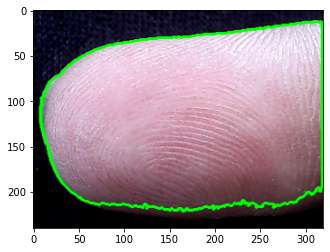

In [84]:
# Find contours
contours, hierarchy = cv2.findContours(image=thresh,
                                       mode=cv2.RETR_TREE,
                                       method=cv2.CHAIN_APPROX_NONE)

# Find the largest contour
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
largest_contour = contours[max_index]

# Draw contour on original image
image_contour = img_RGB.copy()
image_contour = cv2.drawContours(image=image_contour,
                                 contours=largest_contour,
                                 contourIdx=-1,
                                 color=(0, 255, 0),
                                 thickness=2,
                                 lineType=cv2.LINE_AA)
plt.imshow(image_contour);

In [95]:
cloud = o3d.io.read_point_cloud("../data/3D-FLARE-DB/1_rawData/PLYformat/FLARE1002/1002_LI0_S10_F01.ply") # Read the point cloud
o3d.visualization.draw_geometries([cloud]) # Visualize the point cloud